## Importing packages

In [ ]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import pysam
from pysam import FastaFile
import re

In [ ]:
from matplotlib.pyplot import rc_context

## Aminoacid sequences to graph
##### Had to be graphed one sequence at a time, however it can be automatised further to do them all at once

In [ ]:
#Hydractinia shematrin (characterized and uncharacterized) + prisilkin homologs
#Chromosome 3
#LOC130636861_shematrin-like protein 2 XP_057302693_1
#prot = "MLRLKHYQFASTFIMMNYLSFLFTTLANGVEETEDIADAVDDFINQEEDPEMDESETTEDEDEEYDDQENDPSVYTPYRRSGYRYSGYGNARYGIRRGSEIVGSRVLGSGNRINVGSGIGKLGRAGIIGGRRLGGRQILVGSGLAGIGLARRGLVGGKGYGGYGLAGRGGIIGSGLGGRGLVEKSGHLGAGFGGHGLVGGRSALGVRGSITTGKGVSVGYGPYGDERDEMTEDEDENAERDPSLYGSYGRSSYGYSGYGHARYAIRRGSGIVGERVSGGLGGLGKVGIRSGSRINVVSGIGKLGRAGIIGGQGGRKVLIGSGLAGIGLAGRGLVGGKGYGGYGLAGSRGIIGSGLGGRGLVGKNILVGGGLRRHGLVGIRSGLGIRGSVPTAKGISTGYGPYGDESDE"
#LOC130635918_uncharacterized LOC130635918 XP_057301425_1
#prot = "MDESEMTEDEDEEDDDQENDPSVYTPYRRSGYRYSGYGNSRYGIRRGSGIVGRRVLGSRNRINVGSGIGKLGSVGIIGERRLGGRQILVGSGLAGIGLAGRGLVGGKGYGGYGLAGRGGIIGSGLVGRGLVGKRGHLGAGLRGHGLVGGRSALGVRGSIGTGKGVSVGYGSYWDESNEMTEDEDEEDEESDPSVYGSYGRSGYGYSGYGNARYGIRRGSGIVGGRVLGGLGGLAKVGIRGGNRFTVGSGIGKLGRAGINGGQRLGGRKLLVGSGLRGIELAGRGLVVGKGYGGYGLAGGRGIIGSGLGGRGLVGKNTLVGGRSALGVRGSIGTGKGVSVGYGSYWDESNEMTEDEDEEDEESDPSVYGSYGRSVYGYSGYGNARYGIRRGSGIVGGRVLGGLGGLAKVGIRGGSRFTVGSGIGKLGRAGIIGGQRLGGRKLLVGSGLGGIGLAGRGLVVGKGYGGYGLAGGRGIIGSGLGGRGLLGKNTLVGGGLGRHGLVGIRSGLGIRGSIANGKGISRGYGPYGDESDD"
#Chromosome 2
#LOC130628015_shematrin-like protein 1 XP_057297403_1
#prot = "MKTTIAFILFYVAVLSVNAAPAINSNNEGQENALIVNDAVEKNQANDEEQLPNDEIEEEDYPEEEDAEEEDDEDGELKVNDPYQVRSYRRYGRYGGSYGRYTGGYTGRYIGSRYSGRYSRIGSRYGSYGRLSRFRSYRPSYGSSYRRYTTGRYNRYSRYGSRGRYNRYGSSYRRYTPRYRSYRRYTTGRYETKY"
#LOC130628031_shematrin-like protein 1 XP_057297404_1
#prot = "MKTTIAFILFYVAVLSINATPAINTNNEGQENAPVVNDAVENNQANNDEQLPNDEIEEENYPEEEDEKDEDGELEANDPYQVRSYRRYGRYGGSYGRYTGGYTGRYIGSRYTGRYSRIGSRYGTYGRLSRFRSYRPSYGSSYRRYTTGGYNRYSEYGSRGRYNRYGSSYRRYTPRYRSYRRYTTGRYGTKY"
#LOC130627754_shematrin-like protein 1 XP_057297388_1
#prot= "MKTTIAFILFYVAVLSINATPAINTNNEGQENAPVVNDAVENNQANNDEQLPNDEIEEENYPEEEDEKDEDGELEANDPYQVRSYRRYGRYGGSYGRYTGGYTGRYIGSRYTGRYSRIGSRYGTYGRLSRFRSYRPSYGSSYRRYTTGGYNRYSEYGSRGRYNRYGSSYRRYTPRYRSYRRYTTGRYGTKY"
#LOC130627770_shematrin-like protein 1 XP_057297389_1
#prot = "MKTTIAFILFYVAVLSVNAAPAINSNNEGQENALIVNDAVEKNQANDEEQLPNDEIEEEDYPEEEDAEEEDDEDGELKVNDPYQVRSYRRYGRYGGSYGRYTGGYTGRYIGSRYSGRYSRIGSRYGSYGRLSRFRSYRPSYGSSYRRYTTGRYNRYSRYGSRGRYNRYGSSYRRYTPRYRSYRRYTTGRYETKY"
#LOC130627407_shematrin-like protein 1 XP_057297364_1
#prot = "MKTTIAFLIICIVLSVHAAPAVSSIKGKENALLNAVNDAIESNKANDDEQLPNDEIKEEDYPEEEDEEDEEGELEENDPYQARSYRRYGRYGRSYGRYTGGYTGRYIGSRYSGRFSRIGSRFGSYGRLSRYRSFRPSYGSSYRRYTTGGYSRYGSRGSYNRYGSTYRRYTPRFRSYRRYSSGRYGSKY"
#LOC130627423_shematrin-like protein 1 XP_057297365_1
#prot = "MKTTVAFFVFCIAVLCVNAAPAINTNNKGKENALVNAVNDAIENNQVNDDEQLPNGEIEEKDYPEEEDEDDEEGELDENDPYQARSYRRYGRYGGSYGRYTGGYTGRYIGSRYSGRYSQIGSRYGSYGRLSRYRSYRPSYGSSYGRYTTGRYNRYSRYGSRGRYNRYGSAYRRYTPRYRSYTPRYRSYRRYSSGRYGSKY"
#LOC130627440_shematrin-like protein 1 XP_057297366_1
#prot = "MKTAIAFLLFCIAVVNAAPAINTNTEGKENALVNTVNDAVDSNHANDDEQLPNDELEEEDYPEEEDDEDENGELEENDPYQARSYRRYGRYGGSYGRYTGGYTGRYIGSRYSGRYSRIGSRFGSYGRLSRYRSYRPSYGSSYRRYTTGRYSRYGSTYRRYTPRYRSYTPRYRSYRRYNFGRYGSKY"
#LOC130630328_uncharacterized LOC130630328 isoform X1  XP_057299770_1
#prot= "MKLLYGFNQSSDFNVQFVFISVIAEEDVPSKDEDEESDPSTYGGYAGRGVGYGGRYGGHGGRYGGHGGRYGGHGVRYGGHGRRYGGHGGRYGGHGRYGVGYGSYGGRGHSGYGKKAYGDPSYKVYKSVYSHGKHGGRYGGYAGRRVRYGGRYGGHGRRLGGHGGRYGGHGSRYGGHGGRYAGHGGRYGGRRGHGKYGIGYGNYGGRGYSGYGKNAYGDPSYKVYKSVYSHGKHGGRYGRYAGRRVGYGGRYGGHGRRLGGHGGRYGGHGSRYGGHGGRYAGHGGRYGGGRGHGKYGVGYGNYGGRGYSGYGKKAYGDPTYGYGRGYGSGYGLGGYGGRGYGSGYGYGGVTGGYGGYGYGHKAYGDPTYGHGSGYGSGYRSGYGLGGYGGRGYGGGYGYGGVTGGYGGYGYGHKAYGDPTYGSGYGYGGYGGRGYGGGYGYGGSRGGYGGGRGGYGGYGGSGYGHKAYGDEQ"
#LOC130630013_uncharacterized LOC130630013 XP_057299392_1
#prot = "MKLWLLLVCFLVGTLAVIAEEDVPGKDEDEESDPSTYGGYAGRRVGYGGGYGGHGGRYGGHGGRYSGHGVRYGGHGVRYGGHGRRYGGHGGRYGGHGRHGVGYGSYGGRGHSGYGKKAYGDPSYKVYKSVYSNGKHGRRYGGHAGRRVGYGGRYGGHGRRYGGHGGRYGGHGVRYGGHGGQYGGHGGRYGGHGRHGVGYGSYGGRGNSGYGKNAYGDPTYGYGSGYGYGGYGGRGYGSGYGYGGVTGGYGGYGYGHKAYGDPTYGYGSGYGYGGYGGRGYGGGYGYGGGRGGYGGGRGGYGGHGGSGYGHKAYGDEQ"
#LOC130630014_prisilkin-39-like XP_057299394_1
#prot = "MAFSTKRFNMQLWILLVCFLAGAFAEEESDPSSYIYKNVYTYGSHGARYGGHGYGGRYGGLGGYAGARYGAGYGNYGRRGYSGYGHKAYGDPTYGYGSGYALGGYGGRGYGSGYGYGGVTGGYGGYGYGHKAYGDPSYNYGSGYGSGYGLGGYGGRGYGSGYGYGGVTGGYGGYGYGHKAYGDPSYNYGSGHGSGYGSGYGLGGYGGRGYGSGYGYGSVTGGYGGYGYGHKAYGDPTYGYGSGHGYGGYGGRGYGGGYGYGGGRGGYGGGRGGYGGHGGSGYGRKAYGDEQ"
#LOC130630015_keratin-associated protein 19-2-like XP_057299395_1 (this one is because has close proximity to others eventhough is already chracterized)
#prot = "MFFLFLEEESDPSVYGYSNYGGYGYGQGSSYGSYGNGYGYNGHNGLGYGGNKVYGDPSYTYGHAGSNYGYNGNSAGYGGYGYGSYGVVSGNYGGNGYSGYGHKAYGDPTYSYGLGSSYGSYGNSGYGNQGLYGAGYGNYAGHGYSGYGHKAYGDPTYSYGLGSSYGSYGNSGYGNQGSYGAGYGNYGGHGYAGYGHKAYGDPSYTYGYGNSGYTGYGSTGYGSYGGYGSNYGGYGHNAYGDEE"
#LOC130630340_uncharacterized LOC130630340 XP_057299789_1 (is inbetween LOC130630015 and LOC130630016)
#prot = "MKICILLACFLVGTFADEESDPTYGYGSGYGSGYGLGSYGGRGYGSGYGYGGVTGGHGGYGYGHKAYGDPTYSYGSGYGSGYGSGYGSGYGLGGSGGRGYGSGYGYGGVTGGHGGYGYGHKAYGDPSYGYGSGYGSGYGSGYGSGYGLGGSGGRGYGSGYGYGGVTGGHGGYGYGHKAYGDPSYGYGSGYGSGYGSGYTLGGHGGRGYGSGYGYGGARGSYGGYGYGHKAYGDEE"
#LOC130630016 shematrin-like protein 1 XP_057299396_1
#prot = "MVSSSRNYKQASSRVGNTRFKMKLWILLACFLVGTLAVFAEEDVPSQDEDEESDPSTYTYKVYPYGKHGSRYGGYAGRRGGYGGYGSRYGGYGHGKYGVGYGSYGGRGYSGYGHKAYGDPSYKVYKSVYPYKKHGGRYGGYAGRLGGYGGRYGGYGRRYGGYGHGKYGVGYGSYGGRGYSGYGRKAYGDPSYKAYKSVYPYKKHGARYGGYAGRLGGYGGRYGGYGGRYGGYGHGKYGVGYGSYGGRGYSGYGRKAYGDPSYKVYKSVYPYKKHGGRYGGYAGRLGGYGGRYGGYGSRYGGYGHGKYGVGYGSYGTRGYSGYGHKAYGDPTYGYGSGYGYGGYGGRGYGSGYGYGGRGGYGGYGYGHKAYGDPTYGYGSGYGYGGYGGRGYRNGYGYGGRGGYGGYGYGRKAYGDEE"
#LOC130627391_uncharacterized LOC130627391 XP_057297363_1 (is inbetween LOC130630016 and LOC130630017)
#prot = "MKFLTILLCFLVAALAVYAAEETPKEEIQDTEIENEQPVADDSDADQENDPSVYPYRGNYRYSKRYGVRGYRYGHSSRYGSRYTYGGVHKYGGRGRQYGGYSYGHGVRRGKYGNKVYGDATYGGRYAGHGRRYVGHGQRYVGHGRRYVGHGRRYIGHGRRYVGHGRRYVRYGKGYGRGISYGHGKYGRKVYGDASYKGGYAYGGRRYGGRRYVGHGRRYVGHGRRYVGHGRRYVGYGKGYGRGVSYGHGKYGRKVYGDASYKGGYTYGGRRYGGRPYGGRRYGGRRYGGHGRRYVGHGRRYVGYGKGYGRGVSYGHGKYGRKVYGDASYKGGYTYGGRRYGGRRYGGRRYAGHGRRYGGHGRRYGGYGNRYGNRGYGYGARGYRYGHKAYGDEQ"
#LOC130630341_tigger transposable element-derived protein 4-like XP_057299790_1 (reverse transcribed to LOC130630018)
#prot = "MATLPAKLRHSEKFVNTKYEALQQLEKGVSSNEVAAQFRVLKDTLSTWKKNKVKIMESFQSYLQGNKRRGPETYKSLNRTLMKWLLNLRSQNIPTNGPLLKEKANDLPLK"
#LOC130630017_uncharacterized LOC130630017 XP_057299397_1
#prot= "MKFLAILVCFLVAALAVYAAEETPKEEIQDTEIENEQPVADDSDADQENDPSVYPYRGNYRYGKRYGVRGYRYGHSSRYGGLGYRYGGVHKYGGRGRRYGGYSYGHGVGRGKYGNKVYGDARYGGRYAGHGRRYVGHGRRYVGHSRRYVGHGRRYVGHVRRYVGYGKGYGRGVKYGHGKYGRKAYGDASYKGSYTYGGRRYGGHGRRYVGHGRRYVGHGRRYVGHGRRYVGHGRRYGGYGKGYGRGVSYGYGKYGHKAYGDASYKGGYTYGGRRYGGHGRRYVGHGRRYGGHGRRYVGYGNRYGSRGYGYGGRGYRYGHKAYGDEQ"
#LOC130630018_uncharacterized LOC130630018 XP_057299398_1
#prot= "MVRNIELSVIITVFLNSMYVMHHLLSNSKSILKAHADNRYALPRGNEFMLIVDIILVTARCLYSNDIRMRLSCKTPFCFVLSNQNLLYHNSLKITGCIDTKFNGFISSQPGRISCPISSVPDHGIVTARNKSNFAKIKACGLTQNHYSFSIALQSGKKNNITYKRFIMKFLAILLCFLVAALAVHAVEETPKDDVEDTDIENEQMTANDSEADEESDASVYAYRGNYRRYVAHGRRYVGHGRRYVGHGRRYVGHGRRYVGYGKGYGRGVRYGHGKYGRKAYGDASYKGSYTYGGRRYGGHGRRYVGHGRRYVGHGRRYVGHGRRYVGHGRRYGGYGKGYGRGVSYGYGKYGHKAYGDASYKGGYTYGGRRYGGHGRRYVGHGRRYGGHGRRYVGHGRRYVGHGRRYVGYGKGYGRGVSYGHGKYGRKVYGDASYKGGYTYGGRRYGGHGRRYVVHGRRYVGHGRRFVGHGRRYVGHGRRYVGHGRRYGGYGKGYGRGVSYGHGKYGRKVYGDASYKGGYTYGGLRYGGHGRRYVGHGRRYVGHGRRYGGHGRRYVGYGNRYGNRGYGYGGRGYRYGHKVYGDEQ"

In [ ]:
#Stylophora shematrin
#XP_022778164_1 shematrin-like protein 2, partial [Stylophora pistillata]
#prot = "MVPVVDSGSVGVVDGGPVGGVVDGEPFCVLDGGPVVGVIEGGPVGVVDGSPVCVVDSGPVVGVVDGGPVGVVDGGPVVGVVDGGPVVGVVDGGPVGVVDGGPVVSAVDGGPVGLVDGGRVGSVVDGGPAGVVDGDPVVGVVDGGPVGVVDGGLVCVVDGGPVFGVVDGGPVCMVDGGPVVGVFDGGPVGVFDGGPVVGVVDGGPVCVVDGGPVVGVVDGG"

In [ ]:
#Hydra vulgaris shematrin
#XP_047132613.1 shematrin-like protein 1 [Hydra vulgaris]>name in Cazet et al HVAEP8.G015269, HVAEP12.G023655
#prot="MKYGYGGYGGYGGDLYNKGYGYGNNYYSDEPKIAVKEDPIYNSNNKVYGYGGYGGYGGGLYNKGYGGYGFGLYNKGYGYGNNYYSDESKAVKEDSTYNSYNKGYGYGGYGGYGGGLYNKGYGYGSNYYSDKPKIAVKEDPTYNSINKGYGYGGYGGYGGGLYNKGYGGYGLYNIGYGYGNNYYRDESKAVKEDPTYNSYRYGYGGYGGYGGGLYNKGYGYGSNYYSDEFKAAIKKDPTYSSYNKGYGYGGYGGYSGSYNKGYGYGKSYFKDE"
#XP_047132612.1 shematrin-like protein 1 [Hydra vulgaris]>name in Cazet et al HVAEP8.G015269, HVAEP12.G023655
#prot= "MKYGYGGYGGYGGDLYNKGYGYGNNYYSDEPKIAVKEDPIYNSNNKVYGYGGYGGYGGGLYNKGYGGYGFGLYNKGYGYGNNYYSDESKAVKEDSTYNSYNKGYGYGGYGGYGGGLYNKGYGYGSNYYSDKPKIAVKEDPTYNSINKGYGYGGYGGYGGGLYNKGYGGYGLYNIGYGYGNNYYRDESKAVKEDPTYNSYRYGYGGYGGYGGGLYNKGYGYGSNYYSDEFKAAIKKDPTYSSYNKGYGYGGYGGYSGSYNKGYGYGKSYFKDE"
#XP_047122325.1 shematrin-like protein 2 [Hydra vulgaris]>name in Cazet et al HVAEP14.G025835, HVAEP2.G003593
#prot = "MVHLSGLVTLTILFQVFLCKAAPNKHAKDNIVADIMNKDNDNEDEYNYEKSEMSSLNKMSDYGGGYGGGYGGYGYGKREASKDQDKSKGKGGYGGYGYGKREINEDEDISDEYGGGYSGYGGYGGYGYGKRETNKDQDKSKEYGGGYGGYGYGKREINEDKEKSDEYGGGYGGYGYGGYGGYGYGKRETNNDQIKNEGYEGGYGGYGGYGGYGYGKREINNDQLKNEGYGGGYSGYGGYGGYGYSK"
#XP_047136840.1 shematrin-like protein 1 [Hydra vulgaris]>name in Cazet et al HVAEP8.G015269, HVAEP8.G015270
#prot= "MNTVNILFMVVFLNLCVYARSGKILSSYNKGNGYGYGGYEGYGGGLYNNGKGYGNNYYSDESITSMKEDPSYNSYNKEYGYGEYGVYGEYSGGLNNKGYGYENNYFSDESKKALIEDPSYNSYTKGYGYSGYGGYGGGLYSKGYGYGNNYYSDELKKAVKEDPTYNSYNQGYGYGGYGGYKEYGYGNNYYNKEYGYGNNYYDESKSTIKDTSNNL"

In [ ]:
#Actinia tenebrosa shematrin
#XP_031569411.1 shematrin-like protein 2 [Actinia tenebrosa]
#prot= "MKAFLWLLVLIVVVHAETHIEDENFESIXKDSLKGVVQGDDDDDNFGXIGGGGIGGGGIGGGGIGGGVIGGGGDDDDDDNGSGTAPPPQYCVVRYRQCMMFAFTWYAKQVCTNQYYQCVRIMTHPCYRQRSICLSNAGWNYYQRYWCDVRYKQCLAGGQRPN"

In [ ]:
#Cnidarians prisilkin
#Orbicella faveolata
#XP_020632895.1 prisilkin-39-like, partial [Orbicella faveolata]
#prot="YSYYSYYRYYRYYSYYTYHRYYSYYSYYRYNSYYSYYRYYRYYSYYRYYRYYSYYSYYRYYRYYTYYSYYSYYRYNRYYSYYRYYRYYSYYSYYRYNRYYSYYSYYRYNRYYSYYSYYGYYTYYSYYRYYSYYSYYTYYSYYTYYSYYTYHSYDSYYSYYGYYRYYSYYRYDSCYSYYSYYTSAISGHNSEVLHY"
#XP_020603725.1 prisilkin-39-like [Orbicella faveolata]
#prot="MGYSVDYPTDYSADYSTGYSVDYPMAYSVDYPTDNSADYSTGYFVDYPMGCSVDYPTDNSADYSTGYSADYPMGYSADYLRTTLRTTLRGSVDYPMGYSVDYPTDYSADYSADYSTGYCVEYPMGYSVDYPTDNSADYSTGYSVDYPMGYSADSAGGGGRSGKYGIL"
#Pocillopora damicornis
#XP_027057803.1 prisilkin-39-like, partial [Pocillopora damicornis]
#prot="YYKYCSYYRYYRYYNYYSYYRYYNYYSYYRYNNYYSYYRYYRYYSYYSYYSYYSYNRYDRYHRYYSYYGYYGYYTYYSHYSYYSYYSYYSYYSYYSYYGYYRYYSYHRYYSYYRYYTYYRYYTYHSYYTYYSYYGYYTYYMYYSYYSYYSYYRYYGYYSYYRYYT"
#XP_032221528.1 prisilkin-39-like [Nematostella vectensis]
#prot="MCYGYAGYMFYGYAGYMCYGYAGYMFYGYAGYMCYGYAGYMCYGYAGYMFYGYAGYMCYGYAGYMCYGYAGYMCYGYAGYMCYGNAGYMCYGYAGYMFYGYATNYG"
#XP_047144141.1 prisilkin-39-like isoform X1 [Hydra vulgaris]
#prot="MNKVNILFMVVFLNLYVYVRSGKILRSYNKGNGYGYGGYGGELYNNGYGYGNNYYSDESKTSVKEDPTYNSYNKGYGYGAYGGGLYNKGYGYGNSYYSDETKAAMKEDPSYNSYNKGYGYGGYGGYGGGLYNKGYGYGNNYYSDESKMAMKEDPSYTSYNNGYGYGGYGGYGGGLYNKGYGYGNNYYSDELKKAVKEDPAYNSYNKGYGYSGYGGYGGYSGGIYNKGYGYGNNYYSDESKAAIKEDPTYNSFNKGYRYGGYGGNGGSYYKGYGYEKSYFEDE"
#XP_012555018.2 prisilkin-39-like isoform X2 [Hydra vulgaris]
#prot="MCYGYGGYGGELYNNGYGYGNNYYSDESKTSVKEDPTYNSYNKGYGYGAYGGGLYNKGYGYGNSYYSDETKAAMKEDPSYNSYNKGYGYGGYGGYGGGLYNKGYGYGNNYYSDESKMAMKEDPSYTSYNNGYGYGGYGGYGGGLYNKGYGYGNNYYSDELKKAVKEDPAYNSYNKGYGYSGYGGYGGYSGGIYNKGYGYGNNYYSDESKAAIKEDPTYNSFNKGYRYGGYGGNGGSYYKGYGYEKSYFEDE"

In [ ]:
#Molluscs(there is around 100 sequences so it needs to be hand picked which ones are going to be graphed)
#Pinctada fucata
#ACJ06766.1 prisilkin-39 [Pinctada fucata]
#prot="MKGFLTLLLVCAILSTGYCQSRRRAALTGLVAGATIGALASGGLGAGAGGFGVGGFPVGVGAVGIPVAVGGGIPYGYGGYSGYGYGYPAGGYGGYSYGYPTGGYGGYSYGYPTGGYGGYSYGYPTGGYGGYSYGYPTGGYSGYSYGYPTGGYSGYSYGYPTGGYSGYSYGYPTGGYSGYSYGYPTGGYSGYSYGYPTGGYSGYSYPTGGYSGYSYSSTPGYGYYGSGSGMGGMRSGYSYYSSPAPSYYSSGSMTPGYGYYSSGSGIGGGMGSGYSYYSSPAPSYYSSSVSPGYGYYGSGSGMRGYGYYSSSTPMYYGSRSTGYGPFSSGLGGMGSGYSYYSSSTPSYYSSGSMTPGYGYYGSTSYPGPGYGSYSYRTTSYQPSSYGYSSYGTTYPGHGHWHGHKDC"
#BAE93434.1 shematrin-2 [Pinctada fucata]
#prot="MKPFVTLASLIVLIASASADGYDDYKKYGSVGYGPGISLGGGGLGGGGGLISVGGGGGGLGGGLGGGLGGGLVGVGGGGLIGGGFGPGRVSGTINAGGGVFASGSGLGGLSPAGRGAAQGAATLSALQIASGRPGRVSGVSVGTGGGRAVVSGSATPVGGFGVPYGGYGYNYGVPSYGVGLPSYGVSLPSYGVGLGGGYGGYGYGLDLASFQGSTYGNLATGQINTAGGSIPYGGSLGIYGSGIGYGGGYGGYGLGGGYGIGGGYGIGGGYGIGGGYGIGGGYGIGGGYGLGVLGGGSSLYGVSQSLYGGRAVLSGQASGAGVPSFGSISFGGFGVGSPYSIYGGGYPIGIGGGGGGIIGGGGIIGGGGIGGGIIGGGGIGPIGGGIIRKKKY"

#Mizuhopecten
#XP_021362353.1 shematrin-like protein 1 [Mizuhopecten yessoensis]
#prot="MRTACVTLLVVVVALGLSACLGQEGDDVYDDDNYYGVPQYSSGGYASSYPQYGGMTYGQGYGHGKGYGKGYGNGYGKGYGRVESTVIRAPYAAPMPMYMPPPPVMPVGGFGGFGGDDGIFGQNNGLILMLLLLPLLLSNSNGGLLG"

#XP_060069706.1 shematrin-like protein 1 [Ylistrum balloti]
#prot="MRTVSVTLFVVVVALGLSACLGDDFFDDDYSYGQPQYSGGYVMSYPQYGGMSYGKGYGKGYGHGYGHGYGKGYGKVESTVIRAPYAVPFYPPPPPAALAAGGDDGIFGGNGLLFLLLLLPFLLNNNGGLLG"

#XP_052229053.1 shematrin-like protein 2 [Dreissena polymorpha]
#prot="MFSAVTLVLLVSCCGAALSSWIPYGDGNPYPPYSKPGSYPGPWGWQGNDVGSQGNAVRGFGNAVGSQGNDVSGYGNNVGWQWNEVDGKGNYVGWQGNSVN"

#XP_046366280.2 shematrin-like protein 2 [Haliotis rufescens]
#prot="MKTVQLLLVVMAMAAVARALYPFPYMHSPLLLGARMHGLHSGLGIYGLGQGSYMGGSYPYMGHGGSYLGHGGSYPYYGGSISYPVHLDGLGHAGQSGSYPYSGLGGSYPYASSSGSYPYVHLDAPGHAGHSGSYPYSGLGGSYPYASSTGSSYPYAGSVGSYPYAGSVGSYPYAGSVGSSPYAGSVGSYPYAGSVGSYPYAGSVGSYPHAGSVGSYPYAGSVGSYPYAGSVGSYPYAGGQTSVYPQTSPYLHGHSLIH"

#XP_019927159.2 shematrin-like protein 1 [Crassostrea gigas]
#prot="MISLLHFATLLGMTCATYPTYTTGGSYLPYTASGIQGLGFQTLPYSTAGIGNFGLQTYFPSTYNTFGNGYYPSSTYLFNAASYPTVVSHYLYFPDGNPWEPGRNFIDLRVNPYPWYLGYYGGLGDAGFGSTTLPGSYGTFGGSLGYPLGFGGFLSNGLTDIPTFGFPTGSNFGLDPSFSTLTGSLGFGIGGNIGGNIQRSKRCDSQVTLVLNNDSN"

#XP_005108945.2 shematrin-like protein 1 [Aplysia californica]
#prot="MRRPMSTLLPLLLLVLGVALHSSIAASTQRSEDPNSVTSNGGSQQEEQQDNTPDVAASSQGPAASLSSSQLSLPQPAPSAESDARPDYSVSVVNLEKQDPDVLPPVFEKIVEKLFDEYEREDLSQQGEGESQSRQKRQAGYGGYGGSGGYGGSGGYGGSGGYGGYGGYGGSSRQLLGQLAYNLGQQGSSHGQGYGHSQGYGKGYGYDLQPHYGAKIPQDVSYGYSHGKSPMISFVKSFKPGKTYVDKGHVVRNYYRYGNYQVALQHYKLIPTVKVIPYTSYHKIPYKGHVQVKNSYKAYICKDCYHGYPKIDVYEDKKPYSYMVRRFVYLPKSYNINSYAHGDSYGHGDSYGSGDSYGHDDSYGYGGSSYGGSSYGYGDSYGHGDSYGSGGSGYGHGDSYGSGGSGYGYGDSYGHGGSGYGYGNK"

#XP_052102463.1 shematrin-like protein 2 [Mytilus californianus]
#prot="MKIAIFVLLAVCSAVSAHYVKGGYGGYGGYGGSGGYGGYGGYGGYGGGYGGYGGGYGGYGGGYGGGYVGSGHVFVVRPHYGGGYGGYGGGYGGGYGGYGGYGGGYGGYGGYSGGYGGGYGGYGGYGGYGGYSSSKKGGDYGRS"
#XP_052099011.1 shematrin-like protein 2 [Mytilus californianus]
#prot="MTPIVLICLALFGLVASEAGEKGYSPKHNLKTYGNPFGPGNIGSYGYQGNGGFGYPSYGRSGYGYGGYFNNVYGYGSPLNIGGYARNNGFVAQSGLSGYGYFNGRGLNGLSGYGNYGVYGKGIGPFIGYGFGRGLGGYNNINAYGAYGVNNYGSYGIGGINGYGSYGIGGINGYGSYGIGGLNGYGSYGIGGLNGYGSYGIGGINGNGMGAIGGIISGRNHHSGFGSFGKFGEIYFMSMKEQEGNKRRKVGAYGVNNYGSYGIGGINGYGSYGIGGINGYGSYGIGGLNGYGSYGIGGLNGYGSYGIGGINGNGMGAIGGIISGRNHHSGFGSFGKFGGKKGTY"

#XP_059144896.1 shematrin-like protein 1 [Physella acuta]
#prot="MLKSSDITPIVKSSNITPIVEQKRYNAYSKVKQYNAYGKVKRYNVYSKGKQYNAYSKVNQYNAYGKVKRYNADGRVKRCNAYGKVNQYNAYGKVNQCNAYGKVNQYNAYGKVKQFNAYGKVNQYNAYGKVKRYNAYGKVKRYNAYGKVNQYNAYGKVKRYNADGKVKRCNAYGKANQYNAYGKVNQYNAYGKVNQ"

#XP_059177426.1 shematrin-like protein 2 [Physella acuta]
#prot="MSKIALAILALAVLSMSAQASFYGGLGGLGYGGFGGLYGGFGGLGFGGLGYGGLGFGGFGYGGLGFGGLGYGGLGYGFGKSLYY"

#XP_048774336.2 shematrin-like protein 1 [Ostrea edulis]
#prot="MMRFSSLLMFICLYVGLCHAGRYGKWRSPVRYHGYGKQSVIAGNYGMGYTPSYYGYNQGGISFGYPAGFSQGTSSFGYSTTGYMPSTGSSWSSMGYTPSVGSGLSGAISSIGYQSGSSMGYAPSVGSGLGRAISNINYPSGASGYYSQGMYDPYGQGYASGIY"

#XP_048748023.1 shematrin-like protein 2 [Ostrea edulis]
#prot="MRSTYSTIALVLAMGVATTLAAGYGSSGYSGYGSGGSGYGGGYGMYGGGSSGYGSYGGGYGSYGSGYGSYGGGYGGYGSGYGRHGKKHQQTNTAVYIPYAVPVPVQQPLPPPPVMNPLMMAGAMDNQDNGLFGNGASSLLLLLFLIPLLFNTTTITG"

#XP_055888276.1 shematrin-like protein 1 [Biomphalaria glabrata]
#prot="MYKTHLYNSGTHYNSGTHYNSGTHYSSGTHYKSGTHYNSGTHYNSGTHYNSGTHYSSGTHYNSGTHYNSGTHYNNGTHYSSGTHYNSGTHYNSGTHYNSGTHYSSGIHYNSGTHYNSGTHYNSGTHYNSGTHYNSGTHYSNGTHYSSGTHYKSGTHYNSGTHYNTTLTLET"

#XP_055865608.1 shematrin-like protein 1 [Biomphalaria glabrata]
#prot="MFPNQYTTGMFPDQYTTGMFPNQYTTGMFPNQYTTGMFPNQYTTGMFPDQYTTGMFPDQYTTGMFHNQYTTGMFPNQYTTGMFPDQYTTGMFPDQYTTGMFHNQYTTGMFPNQYTTGMFPNQYTTGMFHDQYTTGMFPNQYTTGMFHDQYTTGMFPDQYTTGMFPDQYTTGMFPDQYTTGMFPDQYTTGMFPDQYTTGMFPDQYTTGMFPDQYTTGMFPDQYTTGMFPDQYTTGMFPNQ"

#XP_052834291.1 shematrin-like protein 1 isoform X1 [Octopus bimaculoides]
#prot="MAFMYMLFGLLAAATLFNPTGAQGYGGYGGYGGIPGIGGVASSFGSLGSGFNGAGFTGFGFGGAGAGITFPGYGFGHGYPAVSHANVVPFFASQQTHQIPITSQVHQIPITTRQIQHVPIATQQVHHVPIATTQQVHVPVVNTHTASYHPYPIYRPQQPYIGIDGMTVFNINAPLYNQEPGFYYQHSPSYHNYPTYHHYPQVHYPVRTVMQTQTTHHTVAPTYYGHGHVYGYGGYGHGGYGHGGYGHGGYGGYGQGFGGYGQGFGGYGGHYGGHYGGYGYPYGGHYGHHTGYPYFGYGHGYPHHY"

#XP_014788323.1 shematrin-like protein 1 isoform X2 [Octopus bimaculoides]
#prot="MAFMYMLFGLLAAATLFNPTGAQGYGGYGGYGGIPGIGGVASSFGSLGSGFNGAGFTGFGFGGAGAGITFPGYGFGHGYPAVSHANVVPFFASQQTHQIPITTRQIQHVPIATQQVHHVPIATTQQVHVPVVNTHTASYHPYPIYRPQQPYIGIDGMTVFNINAPLYNQEPGFYYQHSPSYHNYPTYHHYPQVHYPVRTVMQTQTTHHTVAPTYYGHGHVYGYGGYGHGGYGHGGYGHGGYGGYGQGFGGYGQGFGGYGGHYGGHYGGYGYPYGGHYGHHTGYPYFGYGHGYPHHY"

#XP_052706455.1 shematrin-like protein 2 [Crassostrea angulata]
#prot="MRITSGRHNMAQSNNCWCGCCAQNRNRCRRHSLFGIKRCLDQIQITTNRSFKMHSSAVVAALLVLGVALVRADMGYSSGGYDQSGYTSGYASGYDQSGYTSGYTGGYAGGYDSGYGYSTGMGAYGQGMSGYGQGLSGYGHGSSGYGHSTSGYGHKKSMKSVYVPYPVPVEAPVQQPLPLPALGLGVGAETRNQGIFGGNGALLLGLLALTPILLNNNNSG"

#XP_052702969.1 shematrin-like protein 1 [Crassostrea angulata]
#prot="MISLLLFATLLGLTCATYPTYTTGGSYLPYTAGGIQGLGFQTLPYSTGGIGNVGLQTYFPSTYNTFGNGYYPSSSYLFNAASYPTVVSHYLYFPAGNPWEPGRNFIDLRVNPYPWYLGYYGGLGTGFGSTTFPGTYGTFGSSLGYPTGSGGFLNNGLTGFPTTGFPTGYNFGLSPSYTTFTGNLGFGNYGYPGTGVGGYYPTGNLGGQIHRKKIY"

#XP_046561802.1 shematrin-like protein 2 [Haliotis rubra]
#prot="MKVVIAALSVLVCSAFAQVPLRGNSLVGGPLGLGFNNGGLIGNVGVGGKGYGYGYNPKGYNNYGYGKGVAGPFVAGHGSGLVGQGPFVGHAGTLAGHGAFAVGNGPFVAGKGHGYGHNSYNGLGNGVGLVGNGLLGHTEHGIAGPLAFGNGVAGHGYGYGYNPYNNNYGYGKNVAHGAGFIGNGVHGHTGHGVVAPLAVGNGVAGHGYGYGYNPYNNNYGYGKNVRHGAGLVGNGVHGNTAHGVAGHGLVGPFSSGHGVARLGGGQFGNGVGIGKIAIAALFVLVCSTLAQVPIRGRPVGLVGVVGGKDYAYGYNPKGYNNYGYAKGAAGPFVTGHGSGLFGQGPFVGHAGTFAGHGAFAVGNGPFVAGKGHGYGHNSYSRRGNGVGLVGNGLLGHAGHGLAGHGVASHGYGNGNSPYNTNFGYGKNVVIAALSVLVCSAVAQVPLRGNSLVGGFFGLGGVVGNIGVGGKGHGYGYGYNPKGYNNYGYGKGVAGPFVAGHGAGLVGQGPFVGHAGTSAGNRPFAVGNGPFVAGKGHGYGHNSYNGLGNGVGLVGNGLLGHSGHGLAGPLAFGNGVAGHGYGYGYNPYSNNYGYGKNVGHGTGLIGNGVHGHTGHGVAGHGLAGPFSVGHGVAGYGYGNGYNPYNNNYGYGKNVGHGAGLIGHGVHGHTGQGVAGHGLVGNGVGLGKVGFGGVSTVHYY"

#XP_046557269.1 shematrin-like protein 2 [Haliotis rubra]
#prot="MRTFLLLCLVLGTATVTAVPTSFGYGYAHKVKASGLPLYADLGTYGHGGLFMGKYGSSGIGLYKNLYGNGYYGVHGLWQHAGGKILYPKLGGIGIHGKNLGPYGYKPLGLWAGKGSIMYGGYGHTNGLLSGHYGQLSNLDHGAIFGGFGVPYGGIGRGNLLHGFGIVKKGHAFGGSVAYY"

#XP_033735195.1 shematrin-like protein 2 [Pecten maximus]
#prot="MKSSSAALIAICLCLGVSSVWGTGYNSYDTYGSLGGGYSMGYGKGYNGYGGGYGYGKGYGKGYGKGYTSTETVVRQPYMQAVAAPPPLDDQNGVFGLGVFELLILGLPLLLLLRESNTG"

#XP_033758426.1 shematrin-like protein 1 [Pecten maximus]
#prot="MYDYVGGWGMYDYVGGWGMYDYVGGWGIYYYVGGWGMYDYVGGWGMYDYMGGWGMYDYVGGWGMYDYVGGWGMYHYVGGWGLGMYDYVGGWGMYDDEGGWGMYDYVGGWGIYDYVGGWGMYDYVGDLGIYDYVGGWGMYDYVGGWGMYDYMGGWGMYDYVGGWGWGIYDYVGGWGMYDYVGGWGMYDYVGGWGMYDYVGGWGMYDYVGGWGMYDYVGDWGMYDYVGGWGMYDYVGGCGMYDEEGGCGMYDYVGGWGMYDYVGGWGIYDYVGDWGMYDYVGGWGIYDYVGGWGIYDYVGGWGMYDYVGDWGMYDYVGGWGMYDYVGSWGMYDEEGGCGMYDYVGGWGMYVYVGSWGMYDEEGGCGMQYTGRPDYCEVCTRDTSSKKI"

#XP_033731002.1 shematrin-like protein 2, partial [Pecten maximus]
#prot="MGNEVWGNEVWRNEVWGNEVWRNEVWGNEVWRNEVWGNEVWGMRYGGMRYGGMRYGGMRYGGMRYGGMRLRGMRYGGMRYGGMRYGGMRYGGMRYGGMRYGGMRYGGMRYGGMRYGGMRLRGMRLRGMRYGGMRHGGMRLRGMRLRGMRYGGMRLRGMRYGGMRHGGMRLRGMRLRGMRYGGMRLRGMRLRGMRLRGMRYGGMRYGGMRLRGMRYGGMRHGGMRLRGMRLRGMRYGGMRLRGMRYGGMRHGGMRLRGMRLRGMRLRGMRYGGMRYGGMRLRGMRLRGMRYGGMRHGGMRHGGMRLRGMRLD"

#XP_013395389.2 shematrin-like protein 2 [Lingula anatina] #Brachiopod
#prot="MKVAIALLCLFTVASANYKKVSEHVKPFVTYKKAIKVHKVPTLNYVKVPSYKLVKVPTVKVVPVHGSKLVKNVVPVPVKGYTVQRTVIGGGHYGGLGYAGLGGYGAGYGLAGGLRSYGYGAGLGYAGKALGLGYGHGYGYGAGYGYGKY"

#XP_013397443.1 shematrin-like protein 2 [Lingula anatina]
#prot="MKVAVALLALATVASATVVTKPVAPTKPKVSTSVKPFVTYKKAVVTKKVPTVNYKQVVRYVPRVDVVPVHGHRLVQNTVNVPVRGYHLQQTVIGAGPYGGYGGGYGTGYGGVGGGYGGGYGGYGGYGGGYGGGYGGGYSGLGGYGGGYGTGYGHRLDGQCRFWTSLRTFDLPFDIIMKVAVALLALATVASATVVTKPVAPTKPKVSTSVKPFVTYKKAVVTKKVPTVNYKQVVRYVPRVDVVPVHGHRLVQNTVNVPVRGYHLQQTVIGAGPYGGYGGGYGTGYGGVGGGYGGGYGGYGGGYGSGYGGGYSGLGGYGGGYGTGYGGYGFGNGFDFMRGFIGNRVGFGLGPAGYGAGLGAGYGTLGAGYGAAGYGGVGYGVGGVKDLGVGYGATGGYVDGGYGTSGVINGGYVDGGYGTAGVVKNAGGYGTVGVVDGGYGGVVNGGYGSVGTLGTVGTAKKV"

In [ ]:
sp = pd.read_csv('$PATH/signalP/Hydra_vulgaris/output_XP_012555018_2_prisilkin_39_like_isoform_X2__Hydra_vulgaris__plot.txt', sep='\t',  header = None, comment='#',
                names = [
    'pos', 'aa', 'label', 'Other', 'Sec/SPI n', 'Sec/SPI h', 'Sec/SPI c',
    'Sec/SPII n', 'Sec/SPII h', 'Sec/SPII cys', 'Tat/SPI n', 'Tat/SPI RR',
    'Tat/SPI h', 'Tat/SPI c', 'Tat/SPII n', 'Tat/SPII RR', 'Tat/SPII h',
    'Tat/SPII cys', 'Sec/SPIII P', 'Sec/SPIII cons.', 'Sec/SPIII h']
                )

In [ ]:
name = 'XP_012555018_2'

Modifications suggested to assign a specific colour for a protein repeat and a signal peptide

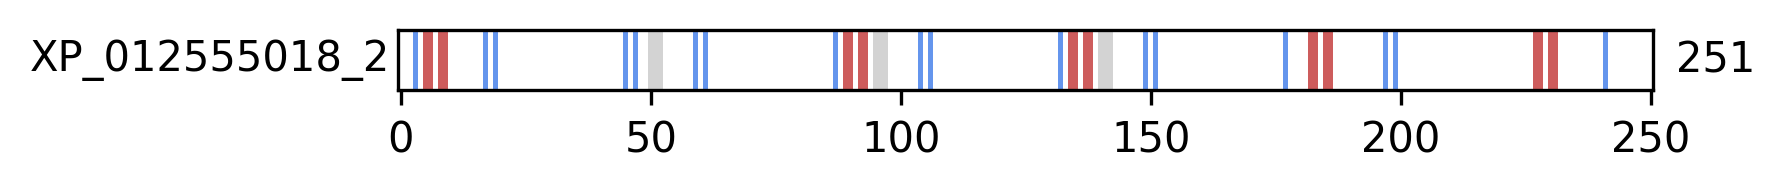

In [ ]:
faas = ['L', 'Y', 'A', 'V', 'I', 'M']#, 'S', 'R', 'F', 'W']

def repeat_finder(prot, faas):
    repeats = {'sing': [], 'dup': [], 'trip': [], 'quad': []}
    pattern = re.compile(r'(G{1,4})')

    for match in pattern.finditer(prot):
        start, end = match.span()
        if start == 0 or prot[start - 1] in faas:
            repeat_sequence = match.group()
            repeat_type = 'sing' if len(repeat_sequence) == 1 else \
                           'dup' if len(repeat_sequence) == 2 else \
                           'trip' if len(repeat_sequence) == 3 else \
                           'quad' if len(repeat_sequence) == 4 else 'sing'
            repeats[repeat_type].append(list(range(start, end)))

    return repeats, len(prot)

repeats, prot_length = repeat_finder(prot, faas)
    #debug info
    #print(repeats)

#cod with zeros
cod = np.zeros(prot_length)

# Colour assigning for repeats
for repeat_type, positions_list in repeats.items():
    for positions in positions_list:
        start, end = positions[0], positions[-1] + 1
        if repeat_type == 'sing':
            cod[start:end] = 1
        elif repeat_type == 'dup':
            cod[start:end] = 2
        elif repeat_type == 'trip':
            cod[start:end] = 3
        elif repeat_type == 'quad':
            cod[start:end] = 4

# Colours for signal peptides
sig_pep = sp['label'].to_list()
sig_colors = {'N': 5, 'H': 6, 'C': 7}
for i, si in enumerate(sig_pep):
    if i < len(cod):
        cod[i] = sig_colors.get(si, cod[i])
#debugg info
    #else:
        #print(f"Warning: Skipping position {i} for signal peptide. Position exceeds the length of the sequence.")

# Create a custom colormap using ListedColormap
custom_colors = ['white', 'cornflowerblue', 'indianred', 'lightgrey', 'plum', 'limegreen', 'gold', 'tomato']
cmap = mpl.colors.ListedColormap(custom_colors)

pixel_per_bar = 5
dpi = 300
fig_height = 0.2  # Desired figure height
fig = plt.figure(figsize=(len(cod) * pixel_per_bar / dpi, fig_height), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1])
ax.set_yticks([])

ax.imshow(cod.reshape(1, -1), cmap=cmap, aspect='auto', interpolation='nearest', vmin=0, vmax=len(custom_colors))
ax.text(-0.15, 0.5, name, rotation='horizontal', va='center', ha='center', transform=ax.transAxes)
ax.text(1.05, 0.5, str(len(cod)), rotation='horizontal', va='center', ha='center', transform=ax.transAxes)
plt.savefig('./figures/Figure_5/'+name+'_fig.pdf', bbox_inches='tight')
plt.show()

### For making table counting the number of repeats per aminoacid sequence for further explorations

In [ ]:
from Bio import SeqIO
fasta_file= '$PATH/signalP/fig_5_aa.fasta'
fasta_batch=  list(SeqIO.parse(fasta_file, "fasta"))
identifiers = []
lengths = []
for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        lengths.append(len(seq_record.seq))

In [ ]:
lengths

[408,
 532,
 194,
 191,
 191,
 194,
 188,
 200,
 186,
 471,
 317,
 291,
 243,
 235,
 417,
 394,
 110,
 326,
 584,
 220,
 272,
 272,
 246,
 215,
 163,
 406,
 393,
 146,
 131,
 100,
 258,
 216,
 425,
 143,
 344,
 195,
 84,
 163,
 157,
 171,
 239,
 305,
 296,
 220,
 215,
 180,
 119,
 386,
 311,
 149,
 462,
 195,
 167,
 165,
 106,
 282,
 251]

In [ ]:
faas = ['L', 'Y', 'A', 'V', 'I', 'M']
def repeat_counter(prot, faas):
    repeats = {'sing': 0, 'dup': 0, 'trip': 0, 'quad': 0}
    pattern = re.compile(r'(G{1,4})')

    for match in pattern.finditer(prot):
        start, end = match.span()
        if start == 0 or prot[start - 1] in faas:
            repeat_sequence = match.group()
            repeat_type = 'sing' if len(repeat_sequence) == 1 else \
                           'dup' if len(repeat_sequence) == 2 else \
                           'trip' if len(repeat_sequence) == 3 else \
                           'quad' if len(repeat_sequence) == 4 else 'sing'
            repeats[repeat_type] += 1

    return repeats, len(prot)

In [ ]:
results_di = {}

with open(fasta_file, "r") as handle:

    for record in SeqIO.parse(handle, "fasta"):
        result = repeat_counter(str(record.seq),faas)
        single = repeats['sing']
        double = repeats['dup']
        triple = repeats['trip']
        quad = repeats['quad']
        repeats = result[0]
        length = result[1]
        results_di[str(record.id)] = repeats#, length

In [ ]:
results_di

{'LOC130636861_shematrin-like_protein_2_[Hydractinia_symbiolongicarpus]': {'sing': 42,
  'dup': 11,
  'trip': 1,
  'quad': 0},
 'LOC130635918_uncharacterized_[Hydractinia_symbiolongicarpus]': {'sing': 66,
  'dup': 21,
  'trip': 1,
  'quad': 0},
 'LOC130628015_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus]': {'sing': 9,
  'dup': 1,
  'trip': 0,
  'quad': 0},
 'LOC130628031_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus]': {'sing': 10,
  'dup': 1,
  'trip': 0,
  'quad': 0},
 'LOC130627754_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus]': {'sing': 10,
  'dup': 1,
  'trip': 0,
  'quad': 0},
 'LOC130627770_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus]': {'sing': 9,
  'dup': 1,
  'trip': 0,
  'quad': 0},
 'LOC130627407_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus]': {'sing': 10,
  'dup': 0,
  'trip': 0,
  'quad': 0},
 'LOC130627423_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus]': {'sing': 11,
  'dup': 1,
  'trip': 0,
  'quad': 0},
 

In [ ]:
df = pd.DataFrame.from_dict(results_di, orient='index')

In [ ]:
df

,sing,dup,trip,quad
LOC130636861_shematrin-like_protein_2_[Hydractinia_symbiolongicarpus],42,11,1,0
LOC130635918_uncharacterized_[Hydractinia_symbiolongicarpus],66,21,1,0
LOC130628015_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],9,1,0,0
LOC130628031_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],10,1,0,0
LOC130627754_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],10,1,0,0
LOC130627770_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],9,1,0,0
LOC130627407_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],10,0,0,0
LOC130627423_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],11,1,0,0
LOC130627440_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],8,1,0,0
LOC130630328_uncharacterized_[Hydractinia_symbiolongicarpus],45,36,4,0


In [ ]:
df['length'] = lengths

In [ ]:
df.sort_values(by=['sing', 'dup','trip','quad','length'], ascending=False)

,sing,dup,trip,quad,length
LOC130635918_uncharacterized_[Hydractinia_symbiolongicarpus],66,21,1,0,532
LOC130630016_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],50,30,0,0,417
LOC130630015_keratin-associated_protein_19-2-like_[Hydractinia_symbiolongicarpus],46,7,0,0,243
LOC130630328_uncharacterized_[Hydractinia_symbiolongicarpus],45,36,4,0,471
LOC130630018_uncharacterized_[Hydractinia_symbiolongicarpus],45,13,0,0,584
LOC130636861_shematrin-like_protein_2_[Hydractinia_symbiolongicarpus],42,11,1,0,408
XP_052099011.1_shematrin-like_protein_2_[Mytilus_californianus],41,15,0,0,344
LOC130630340_uncharacterized_[Hydractinia_symbiolongicarpus],41,9,0,0,235
LOC130627391_uncharacterized_[Hydractinia_symbiolongicarpus],40,16,0,0,394
LOC130630014_prisilkin-39-like_[Hydractinia_symbiolongicarpus],38,18,3,0,291


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df_scaled = scaler.fit_transform(df[['sing','dup','trip','quad']].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns= ['sing','dup','trip','quad'], index= df.index)
df_scaled

,sing,dup,trip,quad
LOC130636861_shematrin-like_protein_2_[Hydractinia_symbiolongicarpus],0.636364,0.305556,0.058824,0.000
LOC130635918_uncharacterized_[Hydractinia_symbiolongicarpus],1.000000,0.583333,0.058824,0.000
LOC130628015_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],0.136364,0.027778,0.000000,0.000
LOC130628031_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],0.151515,0.027778,0.000000,0.000
LOC130627754_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],0.151515,0.027778,0.000000,0.000
LOC130627770_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],0.136364,0.027778,0.000000,0.000
LOC130627407_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],0.151515,0.000000,0.000000,0.000
LOC130627423_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],0.166667,0.027778,0.000000,0.000
LOC130627440_shematrin-like_protein_1_[Hydractinia_symbiolongicarpus],0.121212,0.027778,0.000000,0.000
LOC130630328_uncharacterized_[Hydractinia_symbiolongicarpus],0.681818,1.000000,0.235294,0.000


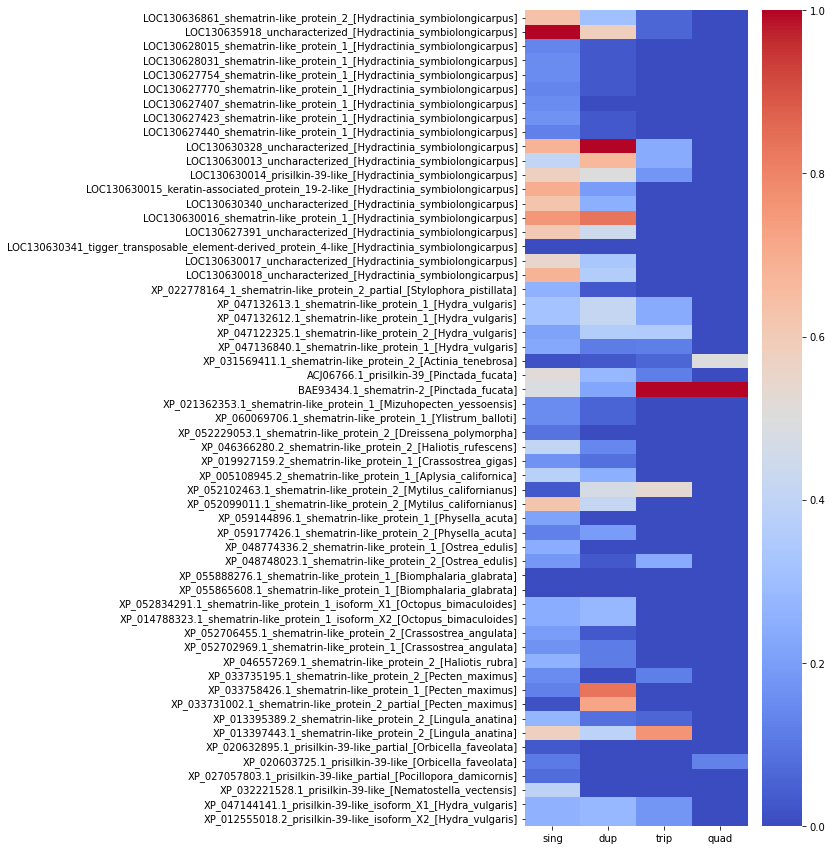

In [ ]:
with rc_context({'figure.figsize': (5, 15)}):
    sns.heatmap(df_scaled, annot=False, cmap='coolwarm')